In [3]:
'''

This model is built with dataset on sold houses in Ames, Iowa. 
Dataset Author: Dean De Cock -> https://www.truman.edu/faculty-staff/decock/
Dataset info: https://www.tandfonline.com/doi/abs/10.1080/10691898.2011.11889627
Column Descriptions: 
    Lot Area: Lot size in square feet.
    Overall Qual: Rates the overall material and finish of the house.
    Overall Cond: Rates the overall condition of the house.
    Year Built: Original construction date.
    Low Qual Fin SF: Low quality finished square feet (all floors).
    Full Bath: Full bathrooms above grade.
    Fireplaces: Number of fireplaces.
Data Documentation: https://s3.amazonaws.com/dq-content/307/data_description.txt

'''

In [4]:
import pandas as pd

In [6]:
# Reading dataset

data = pd.read_csv('AmesHousing.txt', delimiter = '\t')
data.head()

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0        0       5    2010       WD           Normal     215000  
1        0       6    2010       WD           Normal     105000  
2    12500       6    2010       WD           Normal     172000  
3        0       4    2010       WD           Normal     244000  
4        0       3    2010       WD           Normal     189900  

[5 rows x 82 columns]

In [11]:
# Selecting train and test set, 
train = data.iloc[:1460,:]
test = data.iloc[1460:,:]
# target column
target = 'SalePrice'
data.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

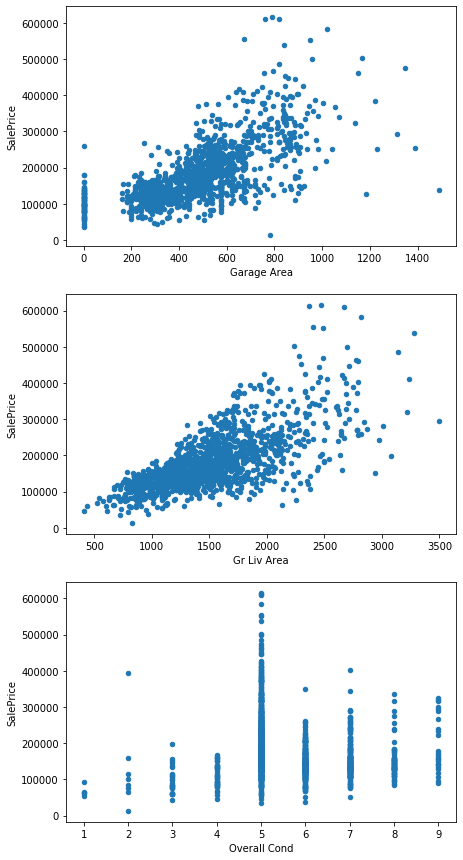

In [13]:
#which feature do we want to use in our model? In linear regression, the assumption is that relationship 
#between feature and target column is linear, we want to find the feature that seems to have the strongest correlation
#with the target (final sales price)
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize = (7,15))
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

train.plot(x='Garage Area', y='SalePrice', ax=ax1, kind='scatter')
train.plot(x='Gr Liv Area', y='SalePrice', ax=ax2, kind='scatter')
train.plot(x='Overall Cond', y='SalePrice', ax=ax3, kind='scatter')
plt.show()
#we can ignore Overall Cond. There's no linear relationship
# but we can focuse on the other two parameter that seem to have a linear relationship with final sales price

In [34]:
#using Linear Regression to find optimal parameter value for our model 
#This is a univariate linear regression model between Gr Liv Area and SalesPrice
from sklearn.linear_model import LinearRegression

x = train[['Gr Liv Area']]
y = train['SalePrice']

#instantiating a linear regression model 
reg = LinearRegression()
reg.fit(x,y)

print('The fitted model can be represeted as y={}*x1 + {}'.format(reg.coef_,reg.intercept_))

The fitted model can be represeted as y=[116.86624683]*x1 + 5366.821710056043


In [35]:
#we can use the above model to predict the target, using the training data and compare to actual SalesPrice
from sklearn.metrics import mean_squared_error
import numpy as np

#predicting target in the train database
pred_train = reg.predict(train[['Gr Liv Area']])
train_rmse = np.sqrt(mean_squared_error(y_true=train['SalePrice'], y_pred=pred_train)) # Root mean squared error

#predicting target in the test databsae
pred_test = reg.predict(test[['Gr Liv Area']])
test_rmse = np.sqrt(mean_squared_error(y_true=test['SalePrice'], y_pred=pred_test))

print('Root Mean Squared Errors (RSME): \n\t-Train database RMSE = {} \n\t-Test database RMSE = {}'.format(train_rmse, test_rmse))

Root Mean Squared Errors (RSME): 
	-Train database RMSE = 56034.362001412796 
	-Test database RMSE = 57088.25161263909


In [49]:
#Multivariete case
# this is in the form of y=a0+a1x1+a2x2+...+anxn
#Let's train the model with two features 'Overall Cond' and 'Gr Liv Area'

cols = ['Overall Cond', 'Gr Liv Area']
x = train[cols]
y = train['SalePrice']
reg = LinearRegression()
reg.fit(x,y)

#predicting target in the train database
pred_train = reg.predict(train[cols])
train_rmse_2 = np.sqrt(mean_squared_error(y_true=train['SalePrice'], y_pred=pred_train)) # Root mean squared error

#predicting target in the test databsae
pred_test = reg.predict(test[cols])
test_rmse_2 = np.sqrt(mean_squared_error(y_true=test['SalePrice'], y_pred=pred_test))
print('Root Mean Squared Errors (RSME): \n\tTrain database RMSE = {} \n\tTest database RMSE = {}\n'.format(train_rmse_2, test_rmse_2))
print('The difference is negligible. It is:\n\t{} points for train database \n\t{} for test database'.format((round(train_rmse-train_rmse_2)), (round(test_rmse-test_rmse_2))))

Root Mean Squared Errors (RSME): 
	Train database RMSE = 56032.398015258674 
	Test database RMSE = 57066.90779448559

The difference is negligible. It is:
	2.0 points for train database 
	21.0 for test database
